In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr

In [2]:
ds = sg.load_dataset("../data/Gorilla_gorilla_ssp/")

In [3]:
ds

<xarray.Dataset> Size: 520MB
Dimensions:               (variants: 10819562, samples: 2, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 10843,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/16)
    call_genotype         (variants, samples, ploidy) int8 43MB dask.array<chunksize=(1000, 2, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 43MB dask.array<chunksize=(1000, 2, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 22MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 22MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    variant_id            (variants) object 87MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 11MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 22MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [4]:
# Together, they calculate the missing rate across all called SNPs. Many inds are horrible (missing rate above 10%)
missing_rate = ds.call_genotype_mask[:,:,0].sum(axis=0).values/ds.call_genotype_mask[:,:,0].count(axis=0).values
missing_rate

array([0.01334093, 0.01055274])

<Axes: ylabel='Count'>

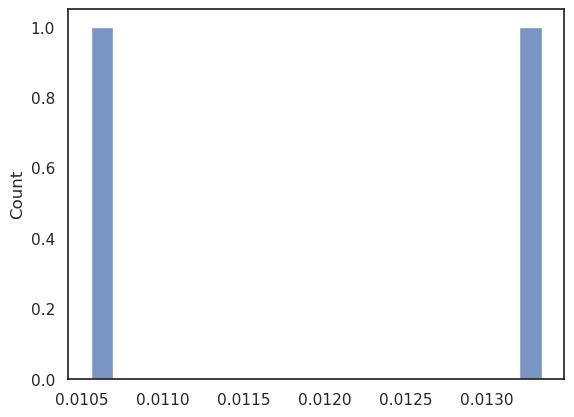

In [5]:
sns.histplot(missing_rate, bins=20)

Checking numbers of inds that are ssp against those who aren't.

In [6]:
import glob

In [9]:
sample_lists = glob.glob("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/*/*.samples")

In [14]:
s_l, c_l = [], []
for samples in sample_lists:
    c = 0
    input_file = open(samples, 'r')
    print(samples.split("/")[-1].split(".")[0])
    for line in input_file.readlines():
        c += 1
        #print(line)
    s_l.append(samples.split("/")[-1].split(".")[0])
    c_l.append(c)
pd.DataFrame({"Species": s_l, "Count": c_l})

Pan_troglodytes_ellioti
Gorilla_gorilla_ssp
Gorilla_gorilla_diehli
Pan_troglodytes_schweinfurthii
Pongo_pygmaeus_ssp
Pongo_abelii_ssp
Pongo_tapanuliensis_ssp
Pan_troglodytes_troglodytes
Gorilla_beringei_beringei
Gorilla_beringei_graueri
Pan_troglodytes_verustroglodyteshybrid
Pan_troglodytes_schweinfurthiitroglodyteshybrid
Pan_troglodytes_verus
Pan_troglodytes_ssp
Pan_paniscus_ssp
Gorilla_gorilla_gorilla


,Species,Count
0,Pan_troglodytes_ellioti,10
1,Gorilla_gorilla_ssp,2
2,Gorilla_gorilla_diehli,1
3,Pan_troglodytes_schweinfurthii,18
4,Pongo_pygmaeus_ssp,21
5,Pongo_abelii_ssp,16
6,Pongo_tapanuliensis_ssp,2
7,Pan_troglodytes_troglodytes,18
8,Gorilla_beringei_beringei,7
9,Gorilla_beringei_graueri,9
